In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
event_data_train = pd.read_csv('event_data_train_1.csv', header=0).\
                        append(pd.read_csv('event_data_train_2.csv', header=0))
df = event_data_train
df[::(df.shape[0] // 50)]

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
69614,32809,1434552802,discovered,1108
139228,32930,1434991539,discovered,1179
208842,32174,1435331262,viewed,8852
278456,32953,1435663333,viewed,5377
348070,33537,1435963039,viewed,16238
417684,31991,1436193580,viewed,25601
487298,34027,1436459174,viewed,9610
556912,33733,1436809623,passed,17823
626526,33939,1437344298,viewed,783


df.shape: (3480703, 4)
____________________________________________________________________________________________________
step_id
int64
notNaN fraction - 1.0
notNaN - 3480703
nunique - 198
                      step_id   step_id
(30328.022, 43253.7]  3408635  0.979295
(120039.9, 132837.6]    47136  0.013542
(145635.3, 158433.0]    20780  0.005970
(107242.2, 120039.9]     4152  0.001193
(132837.6, 145635.3]        0  0.000000
(94444.5, 107242.2]         0  0.000000
(81646.8, 94444.5]          0  0.000000
(68849.1, 81646.8]          0  0.000000
(56051.4, 68849.1]          0  0.000000
(43253.7, 56051.4]          0  0.000000


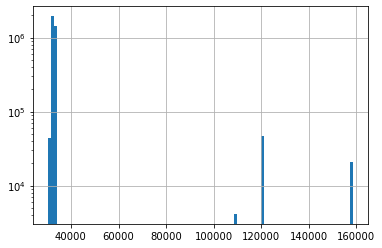

____________________________________________________________________________________________________
timestamp
int64
notNaN fraction - 1.0
notNaN - 3480703
nunique - 2196932
                                timestamp  timestamp
(1434248416.036, 1443584044.3]     729454   0.209571
(1517529614.7, 1526772811.0]       487837   0.140155
(1508286418.4, 1517529614.7]       366822   0.105387
(1471313633.2, 1480556829.5]       351612   0.101018
(1499043222.1, 1508286418.4]       347742   0.099906
(1489800025.8, 1499043222.1]       340990   0.097966
(1480556829.5, 1489800025.8]       284868   0.081842
(1452827240.6, 1462070436.9]       208884   0.060012
(1443584044.3, 1452827240.6]       182294   0.052373
(1462070436.9, 1471313633.2]       180200   0.051771


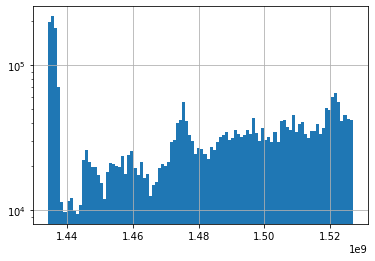

____________________________________________________________________________________________________
action
object
notNaN fraction - 1.0
notNaN - 3480703
nunique - 4
                  action    action
viewed           1830830  0.525994
discovered        689495  0.198091
passed            650331  0.186839
started_attempt   310047  0.089076
    Share among the 10 most common:


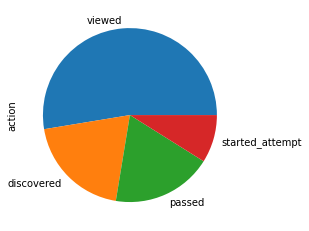

____________________________________________________________________________________________________
user_id
int64
notNaN fraction - 1.0
notNaN - 3480703
nunique - 19234
                               user_id   user_id
(-25.798000000000002, 2680.7]   374290  0.107533
(10719.8, 13399.5]              373736  0.107374
(18758.9, 21438.6]              358354  0.102954
(24118.3, 26798.0]              354523  0.101854
(8040.1, 10719.8]               350599  0.100726
(13399.5, 16079.2]              346817  0.099640
(2680.7, 5360.4]                334766  0.096178
(16079.2, 18758.9]              333833  0.095910
(5360.4, 8040.1]                329284  0.094603
(21438.6, 24118.3]              324501  0.093229


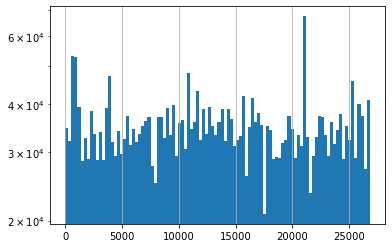

In [30]:
print(f'df.shape: {df.shape}')
for column in df:
    print('_' * 100)
    print(column, 
          df[column].dtypes, 
          f'notNaN fraction - {df[column].notna().sum() / df.shape[0]}', 
          f'notNaN - {df[column].notna().sum()}', 
          f'nunique - {df[column].nunique()}', 
          sep='\n')
    if df[column].dtype in ('object', 'bool'):
        print(
            pd.concat(
                [df[column].value_counts(), 
                 df[column].value_counts() / df[column].notna().sum()],  # why don't work parameter dropna=True?
                axis=1)
        )
        print('    Share among the 10 most common:')
        df[column].value_counts().head(10).plot(kind='pie')
        plt.show()
    elif df[column].dtype in ('float64', 'int64'):  # how write 'all digital types'?
        print(
            pd.concat(
                [df[column].value_counts(bins=10), 
                 df[column].value_counts(bins=10) / df[column].notna().sum()],  # why don't work parameter dropna=True?
                axis=1)
        )
        df[column].hist(bins=100, log=True)
        plt.show()


In [31]:
df.describe()

,step_id,timestamp,user_id
count,3.480703e+06,3.480703e+06,3.480703e+06
mean,3.487358e+04,1.480288e+09,1.331468e+04
std,1.422243e+04,3.068906e+07,7.779099e+03
min,3.045600e+04,1.434341e+09,1.000000e+00
25%,3.217900e+04,1.450271e+09,6.642000e+03
50%,3.292900e+04,1.483904e+09,1.320800e+04
75%,3.348100e+04,1.507889e+09,2.014400e+04
max,1.584330e+05,1.526773e+09,2.679800e+04


In [32]:
df.corr()

,step_id,timestamp,user_id
step_id,1.00000,0.100990,-0.001690
timestamp,0.10099,1.000000,-0.020749
user_id,-0.00169,-0.020749,1.000000


In [33]:
submissions_data_train = pd.read_csv('submissions_data_train.csv', header=0)
df = submissions_data_train
df[::(df.shape[0] // 50)]

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
10182,32810,1436201770,wrong,16791
20364,33334,1436056091,correct,25291
30546,32174,1434631569,correct,6334
40728,32795,1434984462,wrong,22022
50910,33731,1437298726,correct,23394
61092,32244,1436214491,wrong,20475
71274,33538,1436621589,wrong,9018
81456,32244,1435845051,wrong,11025
91638,33539,1436729394,correct,6777


df.shape: (509104, 4)
____________________________________________________________________________________________________
step_id
int64
notNaN fraction - 1.0
notNaN - 509104
nunique - 76
                      step_id   step_id
(31882.225, 40848.4]   503289  0.988578
(111867.6, 120745.0]     5815  0.011422
(102990.2, 111867.6]        0  0.000000
(94112.8, 102990.2]         0  0.000000
(85235.4, 94112.8]          0  0.000000
(76358.0, 85235.4]          0  0.000000
(67480.6, 76358.0]          0  0.000000
(58603.2, 67480.6]          0  0.000000
(49725.8, 58603.2]          0  0.000000
(40848.4, 49725.8]          0  0.000000


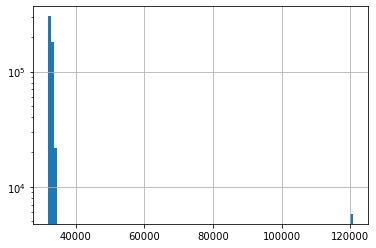

____________________________________________________________________________________________________
timestamp
int64
notNaN fraction - 1.0
notNaN - 509104
nunique - 504343
                                timestamp  timestamp
(1434248513.716, 1443583972.3]     110793   0.217624
(1517528198.7, 1526771227.0]        73420   0.144214
(1508285170.4, 1517528198.7]        54069   0.106204
(1471313057.2, 1480556085.5]        52565   0.103250
(1499042142.1, 1508285170.4]        51982   0.102105
(1489799113.8, 1499042142.1]        49524   0.097277
(1480556085.5, 1489799113.8]        41719   0.081946
(1452827000.6, 1462070028.9]        27607   0.054227
(1462070028.9, 1471313057.2]        24647   0.048413
(1443583972.3, 1452827000.6]        22778   0.044741


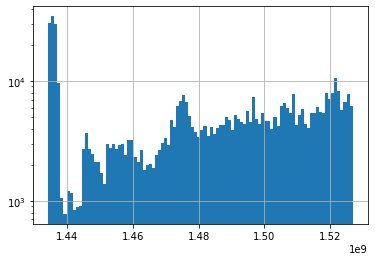

____________________________________________________________________________________________________
submission_status
object
notNaN fraction - 1.0
notNaN - 509104
nunique - 2
         submission_status  submission_status
wrong               286399           0.562555
correct             222705           0.437445
    Share among the 10 most common:


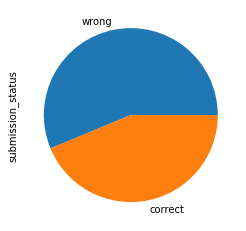

____________________________________________________________________________________________________
user_id
int64
notNaN fraction - 1.0
notNaN - 509104
nunique - 9940
                    user_id   user_id
(-24.797, 2681.6]     57103  0.112164
(8040.8, 10720.4]     53082  0.104266
(10720.4, 13400.0]    52552  0.103224
(24118.4, 26798.0]    51239  0.100645
(2681.6, 5361.2]      50119  0.098446
(13400.0, 16079.6]    50075  0.098359
(18759.2, 21438.8]    49570  0.097367
(16079.6, 18759.2]    49127  0.096497
(21438.8, 24118.4]    48524  0.095313
(5361.2, 8040.8]      47713  0.093720


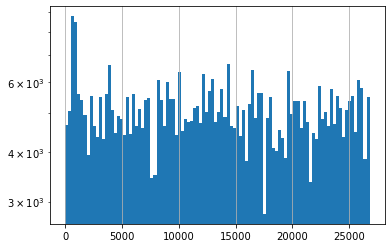

In [34]:
print(f'df.shape: {df.shape}')
for column in df:
    print('_' * 100)
    print(column, 
          df[column].dtypes, 
          f'notNaN fraction - {df[column].notna().sum() / df.shape[0]}', 
          f'notNaN - {df[column].notna().sum()}', 
          f'nunique - {df[column].nunique()}', 
          sep='\n')
    if df[column].dtype in ('object', 'bool'):
        print(
            pd.concat(
                [df[column].value_counts(), 
                 df[column].value_counts() / df[column].notna().sum()],  # why don't work parameter dropna=True?
                axis=1)
        )
        print('    Share among the 10 most common:')
        df[column].value_counts().head(10).plot(kind='pie')
        plt.show()
    elif df[column].dtype in ('float64', 'int64'):  # how write 'all digital types'?
        print(
            pd.concat(
                [df[column].value_counts(bins=10), 
                 df[column].value_counts(bins=10) / df[column].notna().sum()],  # why don't work parameter dropna=True?
                axis=1)
        )
        df[column].hist(bins=100, log=True)
        plt.show()


In [35]:
df.describe()

,step_id,timestamp,user_id
count,509104.000000,5.091040e+05,509104.000000
mean,33732.591433,1.480582e+09,13198.874945
std,9379.377465,3.097267e+07,7820.240678
min,31971.000000,1.434341e+09,2.000000
25%,32031.000000,1.449950e+09,6431.000000
50%,32763.000000,1.484339e+09,13082.000000
75%,33481.000000,1.508326e+09,19985.000000
max,120745.000000,1.526771e+09,26798.000000


In [36]:
df.corr()

,step_id,timestamp,user_id
step_id,1.000000,0.063390,-0.001133
timestamp,0.063390,1.000000,-0.016604
user_id,-0.001133,-0.016604,1.000000
